In [1]:
!pip install underthesea
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
from underthesea import word_tokenize
## for deep learning
import torch

     |████████████████████████████████| 7.5MB 5.4MB/s 
     |████████████████████████████████| 747kB 54.6MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 753.2MB 21kB/s 
     |████████████████████████████████| 1.3MB 51.6MB/s 
     |████████████████████████████████| 245kB 58.6MB/s 
     |████████████████████████████████| 1.1MB 9.6MB/s 
     |████████████████████████████████| 890kB 54.4MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=5911fc5acea0e1e937afbdd7d52a32731c02fef87845def6d4d7e0f40b4f2871
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=f0b7144428db4da089a5aba4ebdb4fe016ef087a456f39666ae87e71b532f9a4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a501236

In [3]:
%cd /content/drive/MyDrive/Projects/Personal Projects/Text Classification/Vietnamese
!ls

/content/drive/MyDrive/Projects/Personal Projects/Text Classification/Vietnamese
 data		       'Text Classication BERT.ipynb'
 pretrained_embedding  'Text Classification.ipynb'
 pretrained_model      'Text Classification PyTorch.ipynb'
 stopwords-nlp-vi.txt


In [ ]:
df_train = pd.read_csv('data/csv/train.csv')
df_dev = pd.read_csv('data/csv/dev.csv')
df_test = pd.read_csv('data/csv/test.csv')

In [ ]:
df_train.head()

,text,label
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc


In [ ]:
def visualize_label(df):
  fig, ax = plt.subplots()
  fig.suptitle("label", fontsize=12)
  df["label"].reset_index().groupby("label").count().sort_values(by= 
        "index").plot(kind="barh", legend=False, 
          ax=ax).grid(axis='x')
  plt.show()

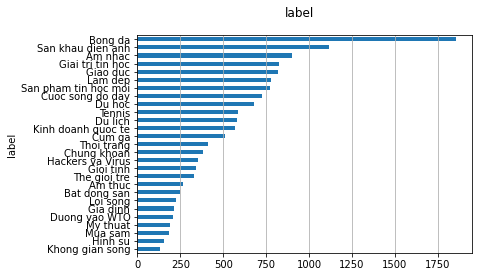

In [ ]:
visualize_label(df_train)

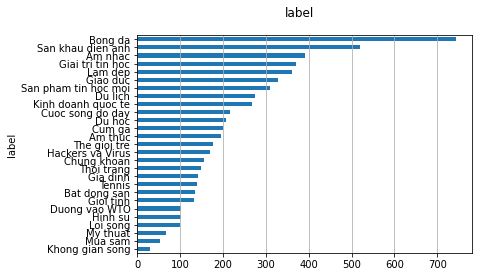

In [ ]:
visualize_label(df_dev)

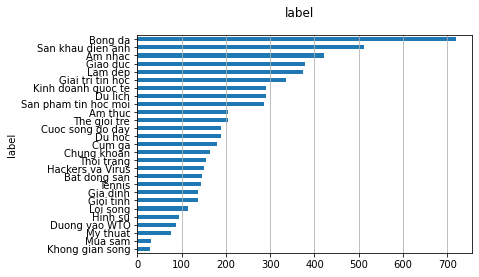

In [ ]:
visualize_label(df_test)

In [ ]:
# Preprocess text
special_characters = '0123456789%@$.,=+-!;/()*"&^:#|\n\t\''
with open('stopwords-nlp-vi.txt', 'r') as f:
   stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])

def preprocess(text):
  text = word_tokenize(text, format='text')
  word_list = [x.strip(special_characters).lower() for x in text.split()]
  split_words = [word for word in word_list if word.encode('utf-8') not in stopwords]
  clean_text = re.sub('_', ' ', ' '.join(split_words))
  return ' '.join(clean_text.split(' ')[1:])

In [4]:
df_train['clean_text'] = df_train['text'].apply(lambda x: preprocess(x))
df_dev['clean_text'] = df_dev['text'].apply(lambda x: preprocess(x))
df_test['clean_text'] = df_test['text'].apply(lambda x: preprocess(x))

NameError: ignored

In [ ]:
df_train.head()

,text,label,clean_text
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc,bánh ống trà vinh gian hàng là một cái nồi đất...
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc,khử mùi tanh ở cá cá tanh là do chứa một số ch...
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc,tré bình định món ăn này đặc biệt dễ làm có v...
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc,cua chiên trứng sau khi chế biến bạn có thể t...
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc,chịn xồm món lạ chịn xồm là món thịt chua của...


In [5]:
df_train = pd.read_csv('data/csv/train_clean.csv')
df_dev = pd.read_csv('data/csv/dev_clean.csv')
df_test = pd.read_csv('data/csv/test_clean.csv')

In [6]:
from collections import Counter
counts = Counter()
for index, row in df_train.iterrows():
  counts.update(row['clean_text'].split(' '))
for index, row in df_dev.iterrows():
  counts.update(row['clean_text'].split(' '))
for index, row in df_test.iterrows():
  counts.update(row['clean_text'].split(' '))

In [7]:
print(counts)

Counter({'': 1965910, 'của': 168208, 'và': 165909, 'có': 155530, 'là': 128368, 'một': 120173, 'trong': 109499, 'các': 109465, 'không': 104759, 'được': 100763, 'với': 100654, 'cho': 99719, 'những': 89381, 'người': 88355, 'đã': 84447, 'tôi': 66866, 'khi': 64873, 'ở': 63310, 'để': 61303, 'này': 61114, 'công': 60474, 'sẽ': 59525, 'cũng': 53960, 'thể': 53458, 'học': 52122, 'vào': 51088, 'như': 49991, 'ra': 48932, 'đến': 48917, 'làm': 47183, 'về': 46388, 'từ': 46204, 'đó': 45837, 'phải': 45713, 'nhiều': 45420, 'đầu': 45017, 'anh': 44389, 'năm': 43980, 'tại': 42870, 'nhưng': 42523, 'lại': 42299, 'thành': 41442, 'chỉ': 41122, 'nhà': 41022, 'sự': 40470, 'trên': 40034, 'sau': 38771, 'hiện': 38149, 'gia': 37433, 'số': 37284, 'còn': 36582, 'trường': 36318, 'bạn': 35669, 'bị': 35040, 'thế': 34715, 'việc': 33584, 'hơn': 33367, 'nhất': 32777, 'mình': 32339, 'đồng': 32157, 'sinh': 31622, 'nước': 31606, 'theo': 31269, 'ngày': 30347, 'rất': 30275, 'trước': 29941, 'định': 29514, 'mới': 28776, 'thì': 2832

In [8]:
# Creating vocabulary
vocab2index = {}
words_l = []
for i, word in enumerate(counts.keys()):
  vocab2index[word] = i + 1
  words_l.append(word)

In [9]:
print(vocab2index)

{'bánh': 1, 'ống': 2, 'trà': 3, 'vinh': 4, 'gian': 5, 'hàng': 6, 'là': 7, 'một': 8, 'cái': 9, 'nồi': 10, 'đất': 11, '': 12, 'nắp': 13, 'miếng': 14, 'gỗ': 15, 'bên': 16, 'trên': 17, 'mọc': 18, 'hai': 19, 'bằng': 20, 'trúc': 21, 'tròn': 22, 'đường': 23, 'kính': 24, 'lớn': 25, 'hoặc': 26, 'nhỏ': 27, 'hơn': 28, 'đồng': 29, 'xu': 30, 'chút': 31, 'dài': 32, 'khoảng': 33, 'gang': 34, 'tay': 35, 'người': 36, 'bán': 37, 'vốc': 38, 'nắm': 39, 'bột': 40, 'gạo': 41, 'trong': 42, 'bàn': 43, 'hơi': 44, 'lại': 45, 'vén': 46, 'khéo': 47, 'rắc': 48, 'lọt': 49, 'vào': 50, 'lòng': 51, 'lấy': 52, 'thiếc': 53, 'làm': 54, 'đậy': 55, 'lỗ': 56, 'giữa': 57, 'chiếc': 58, 'que': 59, 'khói': 60, 'bếp': 61, 'củi': 62, 'bay': 63, 'tản': 64, 'mạn': 65, 'không': 66, 'chẳng': 67, 'mấy': 68, 'chốc': 69, 'chín': 70, 'chủ': 71, 'ra': 72, 'kéo': 73, 'nhẹ': 74, 'cả': 75, 'theo': 76, 'đặt': 77, 'nằm': 78, 'hờ': 79, 'tấm': 80, 'lá': 81, 'chuối': 82, 'cầm': 83, 'sẵn': 84, 'ở': 85, 'kia': 86, 'trắng': 87, 'tinh': 88, 'nổi': 89

In [10]:
def encode_sentence(text, vocab2index, N):
  text = text.split(' ')
  encoded = np.zeros(N, dtype=int)
  enc1 = np.array([vocab2index.get(word, 0) for word in text])
  length = min(N, len(enc1))
  encoded[:length] = enc1[:length]
  return encoded

In [11]:
df_train['encoded'] = df_train['clean_text'].apply(lambda x: encode_sentence(x, vocab2index, 512))
df_dev['encoded'] = df_dev['clean_text'].apply(lambda x: encode_sentence(x, vocab2index, 512))
df_test['encoded'] = df_test['clean_text'].apply(lambda x: encode_sentence(x, vocab2index, 512))

In [12]:
X_train = np.array(df_train['encoded'].values)
X_dev = np.array(df_dev['encoded'].values)
X_test = np.array(df_test['encoded'].values)

In [13]:
df_train.head()

,text,label,clean_text,encoded
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc,bánh ống trà vinh gian hàng là một cái nồi đất...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 10..."
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc,khử mùi tanh ở cá cá tanh là do chứa một số ch...,"[171, 93, 172, 85, 173, 173, 172, 7, 174, 175,..."
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc,tré bình định món ăn này đặc biệt dễ làm có v...,"[251, 252, 253, 254, 114, 255, 256, 257, 222, ..."
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc,cua chiên trứng sau khi chế biến bạn có thể t...,"[306, 243, 307, 208, 145, 308, 309, 12, 262, 1..."
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc,chịn xồm món lạ chịn xồm là món thịt chua của...,"[349, 350, 12, 254, 351, 349, 350, 7, 254, 271..."


In [14]:
## encode y
y_train = df_train["label"].values
y_dev = df_dev["label"].values
y_test = df_test["label"].values

dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}

y_train = np.array([inverse_dic[y] for y in y_train])
y_dev = np.array([inverse_dic[y] for y in y_dev])
y_test = np.array([inverse_dic[y] for y in y_test])

In [21]:
def one_hot_encoding(vocab_d):
  embeddings = np.zeros((len(vocab_d) + 1, len(vocab)))
  for word, idx in vocab_d.items():
        embeddings[idx, idx] =  1


from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
word2vec_model = KeyedVectors.load_word2vec_format('pretrained_embedding/wiki.vi.model.bin', binary=True)
fasttext_model = FastText.load_fasttext_format('pretrained_embedding/vietnamese_fasttext.bin')
fasttext_word_model = FastText.load_fasttext_format('pretrained_embedding/news_word_normalize_model.bin')

def word_2_vec(vocab_d):
  embeddings = np.zeros((len(vocab_d) + 1, 400))
  for word, idx in vocab_d.items():
    ## update the row with vector
    if word in word2vec_model.vocab:
        embeddings[idx] =  word2vec_model[word]
    ## if word not in model then skip and the row stays all 0s
    else:
        continue
  return embeddings

def fasttext(vocab_d, fasttext_model):
  embeddings = np.zeros((len(vocab_d) + 1, 100))
  for word, idx in vocab_d.items():
    ## update the row with vector
      if word in fasttext_model.wv.vocab:
        embeddings[idx] =  fasttext_model[word]
  return embeddings

In [20]:
fasttext_model.wv

In [ ]:
embeddings_word2vec = word_2_vec(vocab2index)
embeddings_fasttext = fasttext(vocab2index, fasttext_model)
embeddings_fasttext_word = fasttext(vocab2index, fasttext_word_model)

In [24]:
from torch.utils.data import Dataset, DataLoader
class TextDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx].astype(np.long)), torch.tensor(self.y[idx], dtype=torch.long)

In [25]:
train_ds = TextDataset(X_train, y_train)
dev_ds = TextDataset(X_dev, y_dev)
test_ds = TextDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
dev_loader = DataLoader(dev_ds, batch_size=128, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

In [26]:
def save_checkpoint(save_path, model, optimizer, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

In [27]:
import torch.nn as nn
class LSTM(nn.Module):

  def __init__(self, vocab_size, embedding_dim, hidden_dim, emb_weights):
    super().__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
    self.embeddings.weight.data.copy_(torch.from_numpy(emb_weights))
    self.embeddings.weight.requires_grad = False
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.linear = nn.Linear(hidden_dim, 27)
    self.dropout = nn.Dropout(0.2)
    self.softmax = nn.Softmax()

  def forward(self, x):
    x = self.embeddings(x)
    lstm_out, (ht, ct) = self.lstm(x)
    linear = self.linear(ht[-1])
    output = self.softmax(linear)
    return output

In [28]:
class CnnLstm(nn.Module):

  def __init__(self, vocab_size, embedding_dim, hidden_dim, emb_weights):
    super().__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
    self.embeddings.weight.data.copy_(torch.from_numpy(emb_weights))
    self.embeddings.weight.requires_grad = False
    self.cnn = nn.Conv1d(512, 512, 3, padding=1)
    self.batchnorm = nn.BatchNorm1d(512)
    self.relu = nn.ReLU()
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.linear = nn.Linear(hidden_dim, 27)
    self.dropout = nn.Dropout(0.2)
    self.softmax = nn.Softmax()

  def forward(self, x):
    x = self.embeddings(x)
    x = self.cnn(x)
    x = self.batchnorm(x)
    x = self.relu(x)
    lstm_out, (ht, ct) = self.lstm(x)
    linear = self.linear(ht[-1])
    output = self.softmax(linear)
    return output

In [29]:
# Training Function
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f'Device {device}')

def train(model,
          optimizer,
          criterion = nn.CrossEntropyLoss(),
          train_loader = train_loader,
          dev_loader = dev_loader,
          num_epochs = 100,
          eval_every = len(train_ds) // 2,
          file_path = "pretrained_model",
          best_dev_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    dev_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    dev_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        print(f'Training epochs {epoch + 1}/{num_epochs}')
        for i, (features, labels) in enumerate(train_loader):
            features = features.to(device)           
            labels = labels.to(device)
            output = model(features)

            loss = criterion(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():                    
        # devation loop
          for features, labels in dev_loader:
              features = features.to(device) 
              labels = labels.to(device)
              output = model(features)

              loss = criterion(output, labels)
              dev_running_loss += loss.item()

              _, predicted = torch.max(output.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

        print('Accuracy: %d %%' % (100 * correct / total))

        # evaluation
        average_train_loss = running_loss
        average_dev_loss = dev_running_loss
        train_loss_list.append(average_train_loss)
        dev_loss_list.append(average_dev_loss)
        global_steps_list.append(global_step)

        # resetting running values
        running_loss = 0.0                
        dev_running_loss = 0.0
        model.train()

        # print progress
        print(f'Epoch [{epoch + 1}/{num_epochs}] Train Loss: {average_train_loss}, dev Loss: {average_dev_loss}')
                  
        # checkpoint
        if best_dev_loss > average_dev_loss:
            best_dev_loss = average_dev_loss
            save_checkpoint(file_path + f'/model_cnn_lstm.pt', model, optimizer, best_dev_loss)
    
    print('Finished Training!')

Device cuda:0


In [ ]:
model = LSTM(vocab_size=embeddings_fasttext.shape[0], embedding_dim=embeddings_fasttext.shape[1], hidden_dim=128, emb_weights=embeddings_fasttext).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=1000)

In [31]:
d = torch.load('pretrained_model/model.pt')

In [33]:
model = LSTM(vocab_size=embeddings_word2vec.shape[0], embedding_dim=embeddings_word2vec.shape[1], hidden_dim=128, emb_weights=embeddings_word2vec).to(device)
model.load_state_dict(d['model_state_dict'])
model.eval()

LSTM(
  (embeddings): Embedding(62893, 400, padding_idx=0)
  (lstm): LSTM(400, 128, batch_first=True)
  (linear): Linear(in_features=128, out_features=27, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (softmax): Softmax(dim=None)
)